# **Projet 5 - Segmentez des clients d'un site e-commerce : Notebook exploratoire**

**Table des matières**<a id='toc0_'></a>    
- 1. [Introduction](#toc1_)    
  - 1.1. [Contexte](#toc1_1_)    
  - 1.2. [Mission](#toc1_2_)    
  - 1.3. [Objectif du notebook](#toc1_3_)    
- 2. [Installation des librairies](#toc2_)    
- 3. [Importation des données](#toc3_)    
- 4. [Analyse Exploratoire](#toc4_)    
  - 4.1. [Customers](#toc4_1_)    
  - 4.2. [Orders](#toc4_2_)    
  - 4.3. [Order_payments](#toc4_3_)    
    - 4.3.1. [Formatage](#toc4_3_1_)    
    - 4.3.2. [Ajout des variables dans data](#toc4_3_2_)    
  - 4.4. [Order_items](#toc4_4_)    
    - 4.4.1. [Formatage](#toc4_4_1_)    
    - 4.4.2. [Ajout des variables dans data](#toc4_4_2_)    
  - 4.5. [Order_reviews](#toc4_5_)    
    - 4.5.1. [Formatage](#toc4_5_1_)    
    - 4.5.2. [Ajout des variables dans data :](#toc4_5_2_)    
- 5. [Finalisation de data](#toc5_)    
- 6. [Création des features engineering](#toc6_)    
  - 6.1. [Création de nouvelles variables](#toc6_1_)    
  - 6.2. [Création du feature engineering_1](#toc6_2_)    
  - 6.3. [Création du feature engineering_2](#toc6_3_)    
- 7. [Enregistrement des données](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Introduction](#toc0_)
### 1.1. <a id='toc1_1_'></a>[Contexte](#toc0_)

Vous êtes consultant pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.  
Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.  
Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.  

### 1.2. <a id='toc1_2_'></a>[Mission](#toc0_)

1. Nous sommes confiants sur le fait que les données à disposition suffiront pour réaliser un premier clustering. Cela a déjà été fait par d’autres prestataires par le passé, avec encore moins de données.  
La segmentation proposée doit être exploitable et facile d’utilisation par notre équipe Marketing. Elle doit au minimum pouvoir différencier les bons et moins bons clients en termes de commandes et de satisfaction. Nous attendons bien sûr une segmentation sur l’ensemble des clients.

2. Une fois le modèle de segmentation choisi, nous souhaiterions que vous nous fassiez une recommandation de fréquence à laquelle la segmentation doit être mise à jour pour rester pertinente, afin de pouvoir effectuer un devis de contrat de maintenance.

### 1.3. <a id='toc1_3_'></a>[Objectif du notebook](#toc0_)

Dans ce Notebook nous verrons : 
- L'analyse exploratoire des différents Datasets
- La sélection et la création de variables pertientes pour répondre à l'étude
- Le nettoyage et la création de différents datasets (différents feature engineerings pour la modélisation)

## 2. <a id='toc2_'></a>[Installation des librairies](#toc0_)

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

## 3. <a id='toc3_'></a>[Importation des données](#toc0_)

In [2]:
# Définition des dossiers : 
dossier_donnees = '1. Données'
dossier_sauvegarde = '2. Sauvegardes'

In [3]:
# Importation des fichiers dans un dictionnaire : 
ls_fichier = [fichier for fichier in os.listdir(dossier_donnees) if fichier.endswith('.csv')]
dataframes = {}

for nom in ls_fichier:
    chemin = os.path.join(dossier_donnees, nom)
    nom_dataframe = os.path.splitext(nom)[0] 
    df = pd.read_csv(chemin)
    dataframes[nom_dataframe] = df

print("Dataframes importés dans le dictionnaire dataframes :\n")

for nom in dataframes.keys():
    print(f"- {nom}")

del ls_fichier, nom, chemin, nom_dataframe, df

Dataframes importés dans le dictionnaire dataframes :

- order_reviews
- customers
- products
- orders
- product_category_name_translation
- geolocation
- order_payments
- sellers
- order_items


In [4]:
# Visualisation des colonnes et dimmensions des dataframes : 

for nom in dataframes.keys(): 
    print(f"Colonnes de {nom} :\n")
    
    for col in dataframes[nom].columns: 
        print(f"- {col}")
    
    print('')
    print(f'Dimension du dataframe {nom} : {dataframes[nom].shape}')
    print('--'*50)
    
del nom, col

Colonnes de order_reviews :

- review_id
- order_id
- review_score
- review_comment_title
- review_comment_message
- review_creation_date
- review_answer_timestamp

Dimension du dataframe order_reviews : (99224, 7)
----------------------------------------------------------------------------------------------------
Colonnes de customers :

- customer_id
- customer_unique_id
- customer_zip_code_prefix
- customer_city
- customer_state

Dimension du dataframe customers : (99441, 5)
----------------------------------------------------------------------------------------------------
Colonnes de products :

- product_id
- product_category_name
- product_name_lenght
- product_description_lenght
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm

Dimension du dataframe products : (32951, 9)
----------------------------------------------------------------------------------------------------
Colonnes de orders :

- order_id
- customer_id
- order_sta

## 4. <a id='toc4_'></a>[Analyse Exploratoire](#toc0_)
### 4.1. <a id='toc4_1_'></a>[Customers](#toc0_)

In [5]:
# Création du dataframe : 

customers = dataframes['customers'].copy()

print(f"Dimensions de customers : {customers.shape}")

print('--'*50)

print(f"Colonnes et pourcentage de valeurs manquantes :\n")
print(customers.isna().mean())

print('--'*50)

print(f"Type de données:\n")
print(customers.dtypes)

Dimensions de customers : (99441, 5)
----------------------------------------------------------------------------------------------------
Colonnes et pourcentage de valeurs manquantes :

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64
----------------------------------------------------------------------------------------------------
Type de données:

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


In [6]:
# Recherche de doublons : 
print(f"Il y a {len(customers[customers.duplicated()])} lignes en doublons")

Il y a 0 lignes en doublons


Variables utiles : 
- customer_id pour le lien avec le  dataframe orders. 
- customer_unique_id pour l'identification du client. 
- customer_zip_code_prefix pour le lien avec le dataframes geolocatio. (typage à mettre en obejct)

In [7]:
# Chagement de type de la colonne customer_zip_code_prefix :
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype('object')

In [8]:
# Création de data avec les colonnes sélectionnées : 
data = pd.DataFrame(customers[['customer_id', 'customer_unique_id', 'customer_zip_code_prefix']]) 

# Vérification : 
print(f"Colonnes de data et valeurs manquantes :\n")
print(data.isna().mean())
print(f"\nDimensions de data : {data.shape}")

del customers

Colonnes de data et valeurs manquantes :

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
dtype: float64

Dimensions de data : (99441, 3)


### 4.2. <a id='toc4_2_'></a>[Orders](#toc0_)

In [9]:
# Création du dataframe : 

orders = dataframes['orders'].copy()

print(f"Dimensions de orders : {orders.shape}")

print('--'*50)

print(f"Colonnes et pourcentage de valeurs manquantes :\n")
print(orders.isna().mean())

print('--'*50)

print(f"Type de données:\n")
print(orders.dtypes)

Dimensions de orders : (99441, 8)
----------------------------------------------------------------------------------------------------
Colonnes et pourcentage de valeurs manquantes :

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001609
order_delivered_carrier_date     0.017930
order_delivered_customer_date    0.029817
order_estimated_delivery_date    0.000000
dtype: float64
----------------------------------------------------------------------------------------------------
Type de données:

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


In [10]:
# Recherche de doublons : 
print(f"Il y a {len(orders[orders.duplicated()])} lignes en doublons")

Il y a 0 lignes en doublons


Variables utiles : 
- customer_id pour le lien avec le  dataframe data. 
- order_id pour l'identification de la commande et le lien avec les autres dataframes.
- order_purchase_timestamp, pour avoir la notion de recence du modèle RFM en marketing et pour l'utilisation dans un second temps pour la création de variables temporelles. 

In [11]:
# Chagement de type de la colonne order_purchase_timestamp :
orders['order_purchase_timestamp'] = orders['order_purchase_timestamp'].astype('datetime64[ns]')

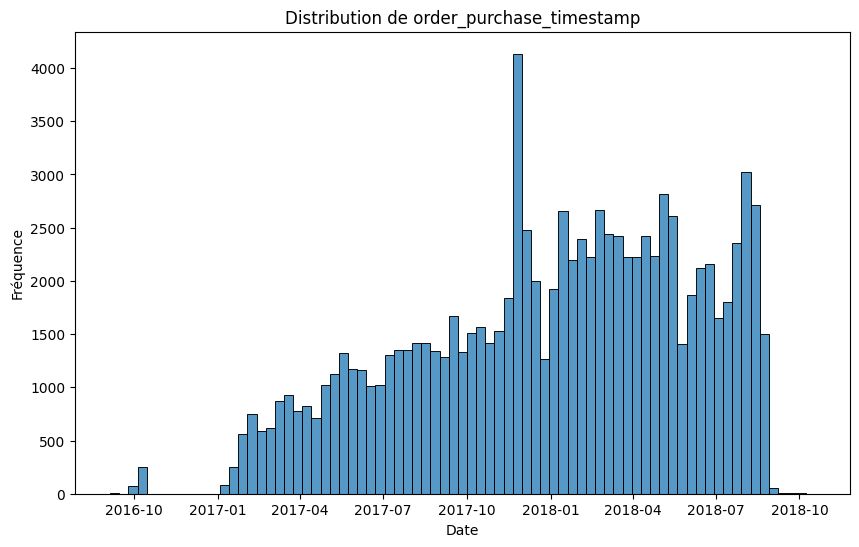

In [12]:
# Visualisation de la répartition de order_purchase_timestamp : 

plt.figure(figsize=(10, 6))
sns.histplot(orders['order_purchase_timestamp'])
plt.xlabel('Date')
plt.ylabel('Fréquence')
plt.title('Distribution de order_purchase_timestamp')
plt.show()

In [13]:
# Ajout des colonnes à data : 
data = data.merge(orders[['customer_id', 'order_id', 'order_purchase_timestamp']], on='customer_id', how='left')

# Vérification : 
print(f"Colonnes de data et valeurs manquantes :\n")
print(data.isna().mean())
print(f"\nDimensions de data : {data.shape}")

del orders

Colonnes de data et valeurs manquantes :

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
order_id                    0.0
order_purchase_timestamp    0.0
dtype: float64

Dimensions de data : (99441, 5)


Les colonnes customer_id et order_id sont en doublons (variables donnant la même information). Choix de la variable order_id pour son lien avec les autres dataframes.

In [14]:
# Suppression de la variables customer_id : 
data = data.drop('customer_id', axis=1)

### 4.3. <a id='toc4_3_'></a>[Order_payments](#toc0_)
#### 4.3.1. <a id='toc4_3_1_'></a>[Formatage](#toc0_)

In [15]:
# Création du dataframe : 

payments = dataframes['order_payments'].copy()

print(f"Dimensions de payments : {payments.shape}")

print('--'*50)

print(f"Colonnes et pourcentage de valeurs manquantes :\n")
print(payments.isna().mean())

print('--'*50)

print(f"Type de données:\n")
print(payments.dtypes)

Dimensions de payments : (103886, 5)
----------------------------------------------------------------------------------------------------
Colonnes et pourcentage de valeurs manquantes :

order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64
----------------------------------------------------------------------------------------------------
Type de données:

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object


In [16]:
# Recherche de doublons : 
print(f"Il y a {len(payments[payments.duplicated()])} lignes en doublons")

Il y a 0 lignes en doublons


Variables utiles : 
- order_id pour le lien avec data.
- payment_value pour avoir la notion de montant du modèle RFM en marketing. 
- payment_installments et payment_type pour la notion des habitudes de paiements d'un utilisatieur dans un second temps.

In [17]:
# Création d'une colonne installments : 
temp_df = payments.groupby('order_id').agg({
    'payment_sequential': 'max',
    'payment_installments': 'sum'
}).reset_index()

# Calcul de la valeur de la variable installments : 
temp_df['installments'] = np.where(temp_df['payment_sequential'] < temp_df['payment_installments'], 1, 0)

# Ajout de la variable à payments : 
payments = payments.merge(temp_df[['order_id', 'installments']], on='order_id')

del temp_df

In [18]:
# Suppression des colonnes payment_sequential et payment_installments : 
payments = payments.drop(['payment_sequential', 'payment_installments'], axis=1)

In [19]:
# Type de paiement : 
print('Types de paiement disponnibles :')
for x in payments['payment_type'].unique():
    print(f'\t-{x}')

del x

Types de paiement disponnibles :
	-credit_card
	-boleto
	-voucher
	-debit_card
	-not_defined


In [20]:
# Suppression des lignes où le paiement n'est pas défini (non utile pour la segmentation) : 
index = payments.loc[payments['payment_type'] == 'not_defined'].index

payments = payments.drop(index, axis=0)

del index

In [21]:
# Réorganisation de payments : 
"""
Création d'une seule ligne par order_id 
Création d'une colonne par payment_type (valeurs = sommes associées)
Création d'une colonne payment_total (valeurs = sommes total de l'order_id)
Report de la colonne installements
"""

# Création d'un payments_pivot :  
payments_pivot = pd.pivot_table(
    payments,
    values='payment_value',
    index='order_id',
    columns='payment_type',
    aggfunc='sum',
    fill_value=0
)

# Réinitialisation de l'index : 
payments_pivot = payments_pivot.reset_index()

# Ajout de la colonne payment_total
payments_pivot['total'] = payments_pivot.iloc[:, 1:].sum(axis=1)

# Report de la colonne installments de payments : 
payments_installments = payments.groupby('order_id')['installments'].first().reset_index()

# Fusion de payments_pivot et payment_installments : 
payments = pd.merge(payments_pivot, payments_installments, on='order_id')

# Renommage des colonnes en ajoutant "payment_" devant chaque nom de colonne de type de paiement : 
payments.rename(columns=lambda x: f"payment_{x}" if x != 'order_id' else x, inplace=True)

del payments_pivot, payments_installments

In [22]:
# Visualisation de payments après Réorgaisation : 
print(f"Dimensions de payments : {payments.shape}")

print('--'*50)

print(f"Colonnes et pourcentage de valeurs manquantes :\n")
print(payments.isna().mean())

print('--'*50)

print(f"Type de données:\n")
print(payments.dtypes)

Dimensions de payments : (99437, 7)
----------------------------------------------------------------------------------------------------
Colonnes et pourcentage de valeurs manquantes :

order_id                0.0
payment_boleto          0.0
payment_credit_card     0.0
payment_debit_card      0.0
payment_voucher         0.0
payment_total           0.0
payment_installments    0.0
dtype: float64
----------------------------------------------------------------------------------------------------
Type de données:

order_id                 object
payment_boleto          float64
payment_credit_card     float64
payment_debit_card      float64
payment_voucher         float64
payment_total           float64
payment_installments      int64
dtype: object


#### 4.3.2. <a id='toc4_3_2_'></a>[Ajout des variables dans data](#toc0_)

In [23]:
# Ajout des colonnes à data : 
data = data.merge(payments, on='order_id', how='left')

# Vérification : 
print(f"Colonnes de data et valeurs manquantes :\n")
print(data.isna().mean())
print(f"\nDimensions de data : {data.shape}")

del payments

Colonnes de data et valeurs manquantes :

customer_unique_id          0.00000
customer_zip_code_prefix    0.00000
order_id                    0.00000
order_purchase_timestamp    0.00000
payment_boleto              0.00004
payment_credit_card         0.00004
payment_debit_card          0.00004
payment_voucher             0.00004
payment_total               0.00004
payment_installments        0.00004
dtype: float64

Dimensions de data : (99441, 10)


In [24]:
# Complétion des valeurs manquantes : 
"""
Complétion des valeurs manquantes à l'aide de price et freight_value du dataframes order_id 
    --> SI pas possible complétion par la valeur moyenne de payment_total
Suppositions : 
- La commande a été rélgée à l'aide du moyen de paiement le plus courant. 
- installments est égal à la valeur la plus courante. 
"""

# Récupération du moyen de paiment le plus courant :
payment_type = 'payment_'+ dataframes['order_payments']['payment_type'].mode()[0]


# Récupération des order_id concerné : 
ls_order_id = list(data.loc[data['payment_total'].isna(), 'order_id'].values)

# Création de df (datframe basé sur order_id_item et ls_order_id) : 
df = dataframes['order_items'].loc[dataframes['order_items']['order_id'].isin(ls_order_id)]

df = df.groupby('order_id')[['price', 'freight_value']].sum()

df = df.reset_index()

# Calcul du payment_total : 
df['payment_total'] = df['price'] + df['freight_value']


# Ajout des valeurs dans data : 
for order_id in ls_order_id: 
   
    if order_id in df['order_id'] and df.loc[df['order_id'] == order_id, 'payment_total'][0] != 0:
        
        data.loc[data['order_id'] == order_id, [payment_type, 'payment_total']] =\
        round(df.loc[df['order_id'] == order_id, 'payment_total'][0],2)
        
        data.loc[data['order_id'] == order_id, 'payment_installments'] = data['payment_installments'].mode()[0]

    else:
        data = data[data['order_id'] != order_id]
    
# Remplissage des modes de paiments restant par 0 : 
data = data.fillna(0)

del payment_type, ls_order_id, df, order_id

In [25]:
# Vérification de la cohérence de la relation du calcul de payment_value sur l'ensemble du dataset (marge de 10 centimes): 

# Calcul de la colonne théorique expected_payment_value avec une marge de tolérance
tolerance = 0.1
data['expected_payment_total'] = data[[
    'payment_boleto',
    'payment_credit_card',
    'payment_debit_card',
    'payment_voucher',
]].sum(axis=1)

# Vérification de la cohérence avec la marge de tolérance
data['equation_check'] = np.abs(data['payment_total'] - data['expected_payment_total']) <= tolerance

# Identification des exceptions où l'équation ne se vérifie pas
exceptions = data[data['equation_check'] == False]

# Suppression des colonnes de l'étude : 
data = data.drop(['expected_payment_total', 'equation_check'], axis=1)

# Visualisation des exceptions
if len(exceptions) == 0: 
    print(f"Il n'y a pas d'incohérence de relation entre les variables de prix")
else:
    print(f"Il y a des incohérence sur {len(exceptions)} lignes\n")
    print(f"Ce qui réprésente {len(exceptions)/len(data)*100:.2f} % de data")
    print(f"eceptions :\n{exceptions}")

del tolerance, exceptions

Il n'y a pas d'incohérence de relation entre les variables de prix


### 4.4. <a id='toc4_4_'></a>[Order_items](#toc0_)
#### 4.4.1. <a id='toc4_4_1_'></a>[Formatage](#toc0_)

In [26]:
# Création du dataframe : 

order_items = dataframes['order_items'].copy()

print(f"Dimensions de order_items : {order_items.shape}")

print('--'*50)

print(f"Colonnes et pourcentage de valeurs manquantes :\n")
print(order_items.isna().mean())

print('--'*50)

print(f"Type de données:\n")
print(order_items.dtypes)

Dimensions de order_items : (112650, 7)
----------------------------------------------------------------------------------------------------
Colonnes et pourcentage de valeurs manquantes :

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64
----------------------------------------------------------------------------------------------------
Type de données:

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


In [27]:
# Recherche de doublons : 
print(f"Il y a {len(order_items[order_items.duplicated()])} lignes en doublons")

Il y a 0 lignes en doublons


Variables utiles : 
- order_id pour le lien avec les autres dataframes.
- shipping_limit_date : permettant dans un second temps de connaitre l'intérêt du client sur les délais d'expédition.
- product_id pour le lien avec le dataframe products. (afin de récupérer la catégorie de produit pour dans un second temps connaitre les préférences du client)
- order_item_id : permettant également dans un second temps de savoir si le client à pour habitude de ne faire qu'une commande par produit ou une commande pour plusieurs produits

In [28]:
# Afin de faire directement le lien avec data, ajout de la colonne product_category_name : 
order_items = order_items.merge(dataframes['products'][['product_id', 'product_category_name']], on='product_id', how='left')

In [29]:
# Supression des colonnes inutiles : 
ls_drop = ['product_id', 'seller_id', 'price', 'freight_value']

order_items = order_items.drop(ls_drop, axis=1)

del ls_drop

In [30]:
# Réorganisation de order_items : 
"""
Regroupement par order_id, pour n'avoir qu'une ligne par commande. 
Création d'une colonne 'number_of_product' ayant pour valeur le nombre de produit dans la commande.
Création d'une colonne 'first_category_product' ayant pour valeur la catégorie de produit principale de la commande. 
Utilisation de la valeur unique de shipping_limit_date.
"""

# Création d'une fonction mode pour récupérer la catégorie de produit principale de la commande : 
def mode(series):
    try:
        return series.mode().iloc[0]
    except IndexError:
        return 'unknown'

# Regroupement par order_id et modification des colonnes :
df = order_items.groupby('order_id').agg({
    'order_item_id' : 'max',
    'shipping_limit_date' : 'unique',
    'product_category_name' : mode,
})

# Récupération de la valeur dans chaque tableau Numpy de shipping_limit_date : 
df['shipping_limit_date'] = df['shipping_limit_date'].apply(lambda x: x[0])

# Chagement des noms des colonnes : 
df.rename(columns={
    'order_item_id' : 'number_of_product',
    'product_category_name' : 'first_category_product',
},
          inplace=True
         )

# Reset de l'index de df et remplacement de order_items : 

df = df.reset_index()
order_items = df

del df 

In [31]:
# Visualisation de order_items après réorgaisation : 
print(f"Dimensions de order_items : {order_items.shape}")

print('--'*50)

print(f"Colonnes et pourcentage de valeurs manquantes :\n")
print(order_items.isna().mean())

print('--'*50)

print(f"Type de données:\n")
print(order_items.dtypes)

Dimensions de order_items : (98666, 4)
----------------------------------------------------------------------------------------------------
Colonnes et pourcentage de valeurs manquantes :

order_id                  0.0
number_of_product         0.0
shipping_limit_date       0.0
first_category_product    0.0
dtype: float64
----------------------------------------------------------------------------------------------------
Type de données:

order_id                  object
number_of_product          int64
shipping_limit_date       object
first_category_product    object
dtype: object


In [32]:
# Chagement de type de shipping_limit_date : 
order_items['shipping_limit_date'] = order_items['shipping_limit_date'].astype('datetime64[ns]')

#### 4.4.2. <a id='toc4_4_2_'></a>[Ajout des variables dans data](#toc0_)

In [33]:
# Ajout des colonnes à data : 
data = data.merge(order_items, on='order_id', how='left')

# Vérification : 
print(f"Colonnes de data et valeurs manquantes :\n")
print(data.isna().mean())
print(f"\nDimensions de data : {data.shape}")

del order_items

Colonnes de data et valeurs manquantes :

customer_unique_id          0.000000
customer_zip_code_prefix    0.000000
order_id                    0.000000
order_purchase_timestamp    0.000000
payment_boleto              0.000000
payment_credit_card         0.000000
payment_debit_card          0.000000
payment_voucher             0.000000
payment_total               0.000000
payment_installments        0.000000
number_of_product           0.007764
shipping_limit_date         0.007764
first_category_product      0.007764
dtype: float64

Dimensions de data : (99437, 13)


In [34]:
# Complétion des valeurs manquantes de number_of_product par le mode :
data.loc[data['number_of_product'].isna(), 'number_of_product'] = data['number_of_product'].mode()[0]

In [35]:
# Complétion des valeurs manquantes de first_category_product par 'unknown' : 
data.loc[data['first_category_product'].isna(), 'first_category_product'] = data['first_category_product'].mode()[0]

In [36]:
# Création d'une colonne temps_expedition : 
"""
La colonne shipping_limit_date a été gardée pour la création d'une variable permettant de connaitre l'affinité du client 
vis à vis du temps d'expédition de la commande.

- Création de la colonne 'temps_expedition' exprimée en nombre de jours (calcul à partir de order_purchase_timestamp et 
shipping_limit_date).
- Complétion de la variable par la valeur la plus courante. 
- Suppression de shipping_limit_date. 
"""

# Création de la colonne 'temps_expedition' : 
data['temps_expedition'] = (data['shipping_limit_date'] - data['order_purchase_timestamp']).dt.days

# Complétion de la colonne 'temps_expedition' par le mode : 
data.loc[data['temps_expedition'].isna(), 'temps_expedition'] = data['temps_expedition'].mode()[0]

# Suprression de la colonne 'shipping_limit_date' : 
data = data.drop('shipping_limit_date', axis=1)

In [37]:
data.shape

(99437, 13)

### 4.5. <a id='toc4_5_'></a>[Order_reviews](#toc0_)
#### 4.5.1. <a id='toc4_5_1_'></a>[Formatage](#toc0_)

In [38]:
# Création du dataframe : 

order_reviews = dataframes['order_reviews'].copy()

print(f"Dimensions de order_reviews : {order_reviews.shape}")

print('--'*50)

print(f"Colonnes et pourcentage de valeurs manquantes :\n")
print(order_reviews.isna().mean())

print('--'*50)

print(f"Type de données:\n")
print(order_reviews.dtypes)

Dimensions de order_reviews : (99224, 7)
----------------------------------------------------------------------------------------------------
Colonnes et pourcentage de valeurs manquantes :

review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       0.883415
review_comment_message     0.587025
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64
----------------------------------------------------------------------------------------------------
Type de données:

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object


In [39]:
# Recherche de doublons : 
print(f"Il y a {len(order_reviews[order_reviews.duplicated()])} lignes en doublons")

Il y a 0 lignes en doublons


Variables utiles : 
- order_id pour le lien avec data
- review_score pour avoir la notion de satisfaction du modèle RFM + S en marketing. 

In [40]:
# Réorganisation de order_reviews :  
"""
Certaines commandes possèdent plusiseurs avis. 

- Création d'une ligne par order_id.
- Création d'une colonne 'review_score_moy' étant la moyenne des review_score pour la commande en question.
"""

# Création du nouveau order_reviews : 
order_reviews = order_reviews[['order_id', 'review_score']]
order_reviews = order_reviews.groupby('order_id').mean()

# Arrondissement des valeurs de la colonne 'review_score' : 
order_reviews['review_score'] = round(order_reviews['review_score'])

# Renommage de la colonne 'review_score' :
order_reviews.rename(columns={'review_score' : 'review_score_moy'}, inplace=True)

# Reset de l'index : 
order_reviews = order_reviews.reset_index()

#### 4.5.2. <a id='toc4_5_2_'></a>[Ajout des variables dans data :](#toc0_)

In [41]:
# Ajout des colonnes à data : 
data = data.merge(order_reviews, on='order_id', how='left')

# Vérification : 
print(f"Colonnes de data et valeurs manquantes :\n")
print(data.isna().mean())
print(f"\nDimensions de data : {data.shape}")

del order_reviews

Colonnes de data et valeurs manquantes :

customer_unique_id          0.000000
customer_zip_code_prefix    0.000000
order_id                    0.000000
order_purchase_timestamp    0.000000
payment_boleto              0.000000
payment_credit_card         0.000000
payment_debit_card          0.000000
payment_voucher             0.000000
payment_total               0.000000
payment_installments        0.000000
number_of_product           0.000000
first_category_product      0.000000
temps_expedition            0.000000
review_score_moy            0.007723
dtype: float64

Dimensions de data : (99437, 14)


In [42]:
# Complétion des valeurs de review_score_moy par la mouyenne de l'ensemble des commandes : 

data.loc[data['review_score_moy'].isna(), 'review_score_moy'] = round(data['review_score_moy'].mean())

## 5. <a id='toc5_'></a>[Finalisation de data](#toc0_)

In [43]:
# Visualisation : 

print(f"Dimensions de data : {data.shape}")

print('--'*50)

print(f"Colonnes et pourcentage de valeurs manquantes :\n")
print(data.isna().mean())

print('--'*50)

print(f"Type de données:\n")
print(data.dtypes)

Dimensions de data : (99437, 14)
----------------------------------------------------------------------------------------------------
Colonnes et pourcentage de valeurs manquantes :

customer_unique_id          0.0
customer_zip_code_prefix    0.0
order_id                    0.0
order_purchase_timestamp    0.0
payment_boleto              0.0
payment_credit_card         0.0
payment_debit_card          0.0
payment_voucher             0.0
payment_total               0.0
payment_installments        0.0
number_of_product           0.0
first_category_product      0.0
temps_expedition            0.0
review_score_moy            0.0
dtype: float64
----------------------------------------------------------------------------------------------------
Type de données:

customer_unique_id                  object
customer_zip_code_prefix             int64
order_id                            object
order_purchase_timestamp    datetime64[ns]
payment_boleto                     float64
payment_credit_card 

In [44]:
# Foramtage du type des données : 
data['number_of_product'] = data['number_of_product'].astype('int64')
data['temps_expedition'] = data['temps_expedition'].astype('int64')
data['review_score_moy'] = data['review_score_moy'].astype('int64')
data['payment_installments'] = data['payment_installments'].astype('int64')

## 6. <a id='toc6_'></a>[Création des features engineering](#toc0_)
### 6.1. <a id='toc6_1_'></a>[Création de nouvelles variables](#toc0_)

In [45]:
# Création d'une variable 'jour_de_commande' : 
data['jour_de_commande'] = data['order_purchase_timestamp'].dt.day_name()

In [46]:
# Création d'une variable 'moment_de_commande' : 

# Création de la variable intermédiaire 'heure_commande' : 
data['heure_commande'] = data['order_purchase_timestamp'].dt.hour

# Création de filtres en fonction des plages horaires : 
conditions = [
    (data['heure_commande'] >= 0) & (data['heure_commande'] < 7),
    (data['heure_commande'] >= 7) & (data['heure_commande'] < 12),
    (data['heure_commande'] >= 12) & (data['heure_commande'] < 14),
    (data['heure_commande'] >= 14) & (data['heure_commande'] < 19),
    (data['heure_commande'] >= 19) & (data['heure_commande'] < 24)
]

# Création des différents moments : 
choices = ['nuit', 'matin', 'midi', 'après-midi', 'soir']

# Création de la variable dans data 
data['moment_de_commande'] = pd.Series(np.select(conditions, choices))

# Suppression de la variables intermédiaire : 
data = data.drop('heure_commande', axis=1)

del conditions, choices

In [47]:
# Création de la variables recence par commande : 

# Calcul de la dernière date de commande du dataset : 
last_date = data['order_purchase_timestamp'].max()

# Calcul de la recence par commande : 
data['recence'] = (last_date - data['order_purchase_timestamp']).dt.days

del last_date

### 6.2. <a id='toc6_2_'></a>[Création du feature engineering_1](#toc0_)
Création de data_RFMS répondant à la météhode RFMS (recence, fréquence, montant, satisfaction) en marketing pour chaque client.

In [48]:
# Création de data_RFMS à partir des customer_unique_id : 

data_RFMS = data.groupby('customer_unique_id').agg({
    'recence' : 'min',
    'order_id' : 'nunique',
    'payment_total' : 'sum',
    'review_score_moy' : 'mean',
})

# Renommage des colonnes : 
data_RFMS = data_RFMS.rename(columns={
    'recence': 'recence',
    'order_id': 'frequence',
    'payment_total': 'montant',
    'review_score_moy': 'satisfaction',
})

# Aronndi de la colonne satisfaction et typage : 
data_RFMS['satisfaction'] = round(data_RFMS['satisfaction']).astype('int64')

# Reset de l'index : 
data_RFMS = data_RFMS.reset_index()


In [49]:
# Visualisation : 
print('Colonnes de data_RFMS :\n')
for col in data_RFMS.columns:
    print(f"\t- {col}")
    
del col

Colonnes de data_RFMS :

	- customer_unique_id
	- recence
	- frequence
	- montant
	- satisfaction


### 6.3. <a id='toc6_3_'></a>[Création du feature engineering_2](#toc0_)

In [50]:
# Création de data avec l'ensemble des données pour le clustering aggréger par customer_unique_id : 

data_FE2 = data.groupby('customer_unique_id').agg({
    'payment_boleto' : 'sum',
    'payment_credit_card' : 'sum',
    'payment_debit_card' : 'sum',
    'payment_voucher' : 'sum',
    'payment_installments': 'first',
    'number_of_product' : 'sum',
    'temps_expedition' : 'mean',
    'jour_de_commande' : 'first',
    'moment_de_commande' : 'first',
})


# Renommage des colonnes : 
data_FE2 = data_FE2.rename(columns={
    'number_of_product' : 'number_of_product_tot',
    'payment_installments' : 'payment_installments_mode',
    'jour_de_commande' : 'jour_de_commande_mode',
    'temps_expedition' : 'temps_expedition_moy',
    'moment_de_commande' : 'moment_de_commande_mode',
})

# Reset de l'index : 
data_FE2 = data_FE2.reset_index()

# Ajout des colonnes RFMS : 
data_FE2 = data_RFMS.merge(data_FE2, on='customer_unique_id', how='left')

# Mise en index de la colonne customer_unique_id : 
data_FE2 = data_FE2.set_index('customer_unique_id')

In [51]:
# Visualisation : 
print('Colonnes de data_FE2 :\n')
for col in data_FE2.columns:
    print(f"\t- {col}")
    
del col

Colonnes de data_FE2 :

	- recence
	- frequence
	- montant
	- satisfaction
	- payment_boleto
	- payment_credit_card
	- payment_debit_card
	- payment_voucher
	- payment_installments_mode
	- number_of_product_tot
	- temps_expedition_moy
	- jour_de_commande_mode
	- moment_de_commande_mode


## 7. <a id='toc7_'></a>[Enregistrement des données](#toc0_)

In [52]:
# Enregistrement des données : 

name = 'data'
with open(dossier_sauvegarde + '/' + name + '.pickle', 'wb') as f:
    pickle.dump(data, f)

name = 'data_RFMS'
with open(dossier_sauvegarde + '/' + name + '.pickle', 'wb') as f:
    pickle.dump(data_RFMS, f)

name = 'data_FE2'
with open(dossier_sauvegarde + '/' + name + '.pickle', 'wb') as f:
    pickle.dump(data_FE2, f)

del name, dossier_sauvegarde, dossier_donnees